# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key




temperature = []
humidity = []
cloudiness = []
windspeed = []
citynumber = []
cityname = []
latitude = []
longitude = []
date = []
country = []

record = 1



for city in cities:
    
    try:
        response = requests.get(f"{url}&q={city}").json()
        cityname.append(response['name'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])  
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_record = response['name']
    
        print(f'City record {record}:{city_record}')
        
        record = record + 1
        
    except (KeyError):
        print('City not found')
    continue

City record 1:Vaini
City record 2:Khatanga
City record 3:Talcahuano
City record 4:Tasiilaq
City not found
City record 5:Sāmbhar
City record 6:Castro
City record 7:Rafaela
City record 8:Barrow
City record 9:Atbasar
City record 10:Isernia
City record 11:Igarka
City record 12:Punta Arenas
City record 13:Nizhniy Odes
City record 14:Jamestown
City record 15:East London
City record 16:Saskylakh
City record 17:Carnarvon
City record 18:Albany
City record 19:Beringovskiy
City record 20:Faanui
City record 21:Aden
City record 22:Honningsvåg
City record 23:Bluff
City record 24:New Norfolk
City record 25:Kununurra
City not found
City record 26:Provideniya
City record 27:Irituia
City not found
City record 28:Teguise
City record 29:Denpasar
City record 30:Guiyang
City record 31:West Fargo
City record 32:Butaritari
City record 33:Clyde River
City record 34:Hobart
City record 35:Ushuaia
City record 36:Hermanus
City not found
City not found
City record 37:São João da Barra
City record 38:Murgab
City rec

City record 311:Viedma
City record 312:Havelock
City record 313:Saint-Pierre
City record 314:Roald
City record 315:Nabire
City record 316:Paka
City record 317:Sittwe
City not found
City record 318:Ozernovskiy
City not found
City record 319:Nur-Sultan
City record 320:Souillac
City record 321:Ahipara
City record 322:Petropavlovsk-Kamchatskiy
City record 323:Kaeo
City record 324:Orativ
City record 325:Hatillo
City record 326:Mae Hong Son
City record 327:Katangli
City record 328:Pierre
City record 329:Bathsheba
City record 330:Agadez
City record 331:Oranjestad
City record 332:Samarai
City record 333:São Simão
City not found
City not found
City record 334:Auki
City record 335:Lorengau
City record 336:Saint Anthony
City record 337:Marsh Harbour
City record 338:Tautira
City record 339:Kropotkin
City record 340:Voskresenskoye
City record 341:El Reno
City record 342:Olafsvik
City record 343:Três Lagoas
City record 344:Batagay-Alyta
City record 345:Port Hardy
City record 346:Mamit
City record 34

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create Data Dictionary
city_weather_data = {'City': cityname, 'Max Temperature': temperature, 'Humidity': humidity,
                   'Cloudiness': cloudiness,
                   'Wind Speed': windspeed,
                   'Latitude' :latitude,
                   'Longitude': longitude}
#Create, export and print DataFrame
city_weather_data_df = pd.DataFrame(city_weather_data)
city_weather_data_df.to_csv('Data_CSV/city_weather_data.csv')
city_weather_data_df

,City,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Vaini,78.80,94,75,14.97,-21.2000,-175.2000
1,Khatanga,-29.72,79,0,10.65,71.9667,102.5000
2,Talcahuano,62.60,82,75,6.91,-36.7167,-73.1167
3,Tasiilaq,26.60,46,0,18.41,65.6145,-37.6368
4,Sāmbhar,53.60,62,0,3.20,26.9167,75.2000
...,...,...,...,...,...,...,...
579,Thinadhoo,81.72,71,33,9.01,0.5333,72.9333
580,High Level,-16.60,63,20,1.90,58.5169,-117.1360
581,Vágur,37.67,77,98,19.15,61.4732,-6.8119
582,Necochea,60.01,74,100,17.11,-38.5473,-58.7368


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
humidity_check = city_weather_data_df.loc[city_weather_data_df['Humidity']>100]
humidity_check

,City,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude


In [6]:
# NOTE: No cities have humidy greater than 100%


#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# NOTE: No cities have humidy greater than 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

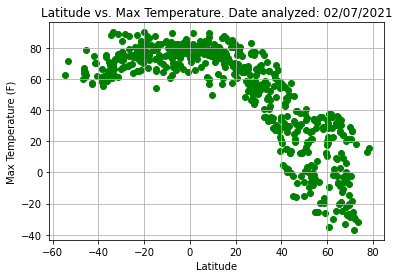

In [6]:
plt.scatter(city_weather_data_df["Latitude"], city_weather_data_df["Max Temperature"], color = "green")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs. Max Temperature. Date analyzed: {today}")
plt.savefig("Images/scatter_latitude_temperature")
plt.show()

The plot is dsiplaying the relationship between the proximity of a city to the equator (0 degrees Latitude) and the Max Temperature recorded in the city. Citieslocated south of the equator have little variance in temperature as proximity to the equator increases with most max temperatures of cities at or above 60 degrees Fahrenheit. However, in the Northern hemisphere (locations north of the equator or above 0 degrees latitude), as the distance of the city from the equator increases, the max temperatures decrease.

## Latitude vs. Humidity Plot

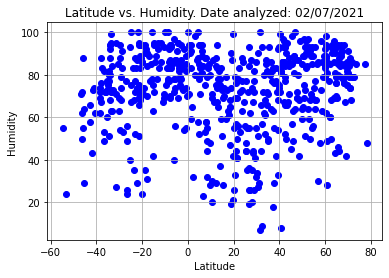

In [8]:
plt.scatter(city_weather_data_df["Latitude"], city_weather_data_df["Humidity"], color = "blue")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs. Humidity. Date analyzed: {today}")
plt.savefig("Images/scatter_latitude_humidity")
plt.show()

Simply put, no correlation exists between latitude (proximity of city to the equator) and Humidity.

## Latitude vs. Cloudiness Plot

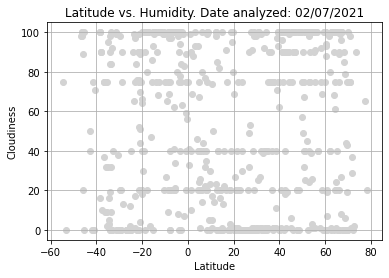

In [9]:
plt.scatter(city_weather_data_df["Latitude"], city_weather_data_df["Cloudiness"], color = "lightgrey")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Humidity. Date analyzed: {today}")
plt.savefig("Images/scatter_latitude_cloudiness")
plt.show()

Simply put, no correlation exists between latitude (proximity of city to the equator) and Cloudiness.

## Latitude vs. Wind Speed Plot

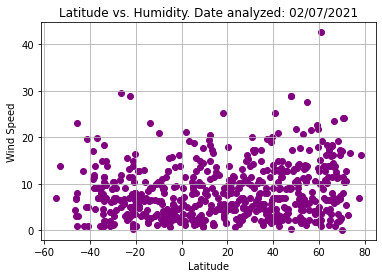

In [10]:
plt.scatter(city_weather_data_df["Latitude"], city_weather_data_df["Wind Speed"], color = "purple")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs. Humidity. Date analyzed: {today}")
plt.savefig("Images/scatter_latitude_cloudiness")
plt.show()

Simply put, little correlation  exists between latitude (proximity of city to the equator) and Wind Speed.

## Linear Regression

In [ ]:
#Define northern and southern hemisphere
nor_Hemisphere = weather_data.loc[weather_data['Lat']>=0]
sou_Hemisphere = weather_data.loc[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression